In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
%matplotlib inline
import seaborn as sns
import os
import warnings
import re
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/content/gym and diet recommendation.csv')
df.head()

,ID,Sex,Age,Height,Weight,Hypertension,Diabetes,BMI,Level,Fitness Goal,Fitness Type,Exercises,Diet
0,1,Male,18,1.68,47.5,No,No,16.83,Underweight,Weight Gain,Muscular Fitness,"Squats, deadlifts, bench presses, and overhead...","Vegetables: (Carrots, Sweet Potato, and Lettuc..."
1,2,Male,18,1.68,47.5,Yes,No,16.83,Underweight,Weight Gain,Muscular Fitness,"Squats, deadlifts, bench presses, and overhead...","Vegetables: (Tomatoes, Garlic, leafy greens, b..."
2,3,Male,18,1.68,47.5,No,Yes,16.83,Underweight,Weight Gain,Muscular Fitness,"Squats, yoga, deadlifts, bench presses, and ov...","Vegetables: (Garlic, Roma Tomatoes, Capers and..."
3,4,Male,18,1.68,47.5,Yes,Yes,16.83,Underweight,Weight Gain,Muscular Fitness,"Squats, yoga, deadlifts, bench presses, and ov...","Vegetables: (Garlic, Roma Tomatoes, Capers, Gr..."
4,5,Male,18,1.68,47.5,No,No,16.83,Underweight,Weight Gain,Muscular Fitness,"Squats, deadlifts, bench presses, and overhead...","Vegetables: (Carrots, Sweet Potato, Lettuce); ..."


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14589 entries, 0 to 14588
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            14589 non-null  int64  
 1   Sex           14589 non-null  object 
 2   Age           14589 non-null  int64  
 3   Height        14589 non-null  float64
 4   Weight        14589 non-null  float64
 5   Hypertension  14589 non-null  object 
 6   Diabetes      14589 non-null  object 
 7   BMI           14589 non-null  float64
 8   Level         14589 non-null  object 
 9   Fitness Goal  14589 non-null  object 
 10  Fitness Type  14589 non-null  object 
 11  Exercises     14589 non-null  object 
 12  Diet          14589 non-null  object 
dtypes: float64(3), int64(2), object(8)
memory usage: 1.4+ MB


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.isnull().sum()

,0
ID,0
Sex,0
Age,0
Height,0
Weight,0
Hypertension,0
Diabetes,0
BMI,0
Level,0
Fitness Goal,0


In [ ]:
df.describe()

,ID,Age,Height,Weight,BMI
count,14589.000000,14589.000000,14589.000000,14589.000000,14589.000000
mean,7295.000000,39.554870,1.699851,70.505991,24.417569
std,4211.625874,13.192655,0.098129,20.030635,6.765144
min,1.000000,18.000000,1.300000,32.000000,9.520000
25%,3648.000000,28.000000,1.640000,55.000000,18.940000
50%,7295.000000,39.000000,1.680000,70.000000,25.250000
75%,10942.000000,51.000000,1.770000,86.000000,29.320000
max,14589.000000,63.000000,2.030000,130.000000,70.000000


In [ ]:
df.describe(include='object')

,Sex,Hypertension,Diabetes,Level,Fitness Goal,Fitness Type,Exercises,Diet
count,14589,14589,14589,14589,14589,14589,14589,14589
unique,2,2,2,4,2,2,5,11
top,Male,No,No,Overweight,Weight Loss,Cardio Fitness,"Brisk walking, cycling, swimming, running , or...","Vegetables: (Garlic, Mushroom, Green Papper, I..."
freq,9374,7838,7838,4142,7581,7581,4206,5038


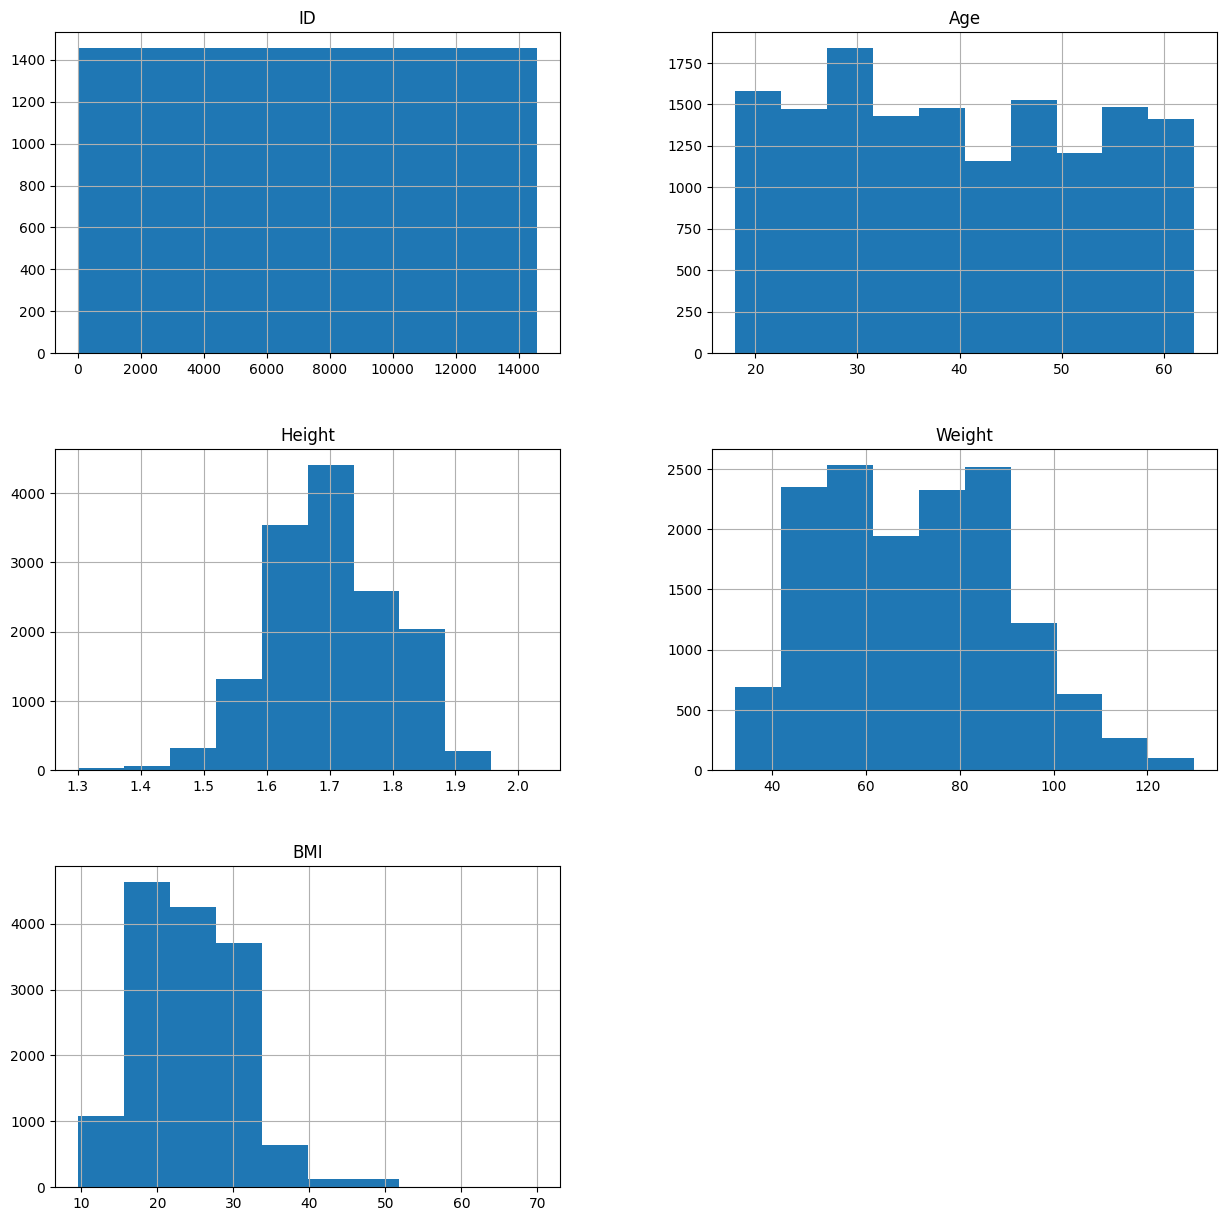

In [ ]:
df.hist(figsize=(15,15))
plt.show()

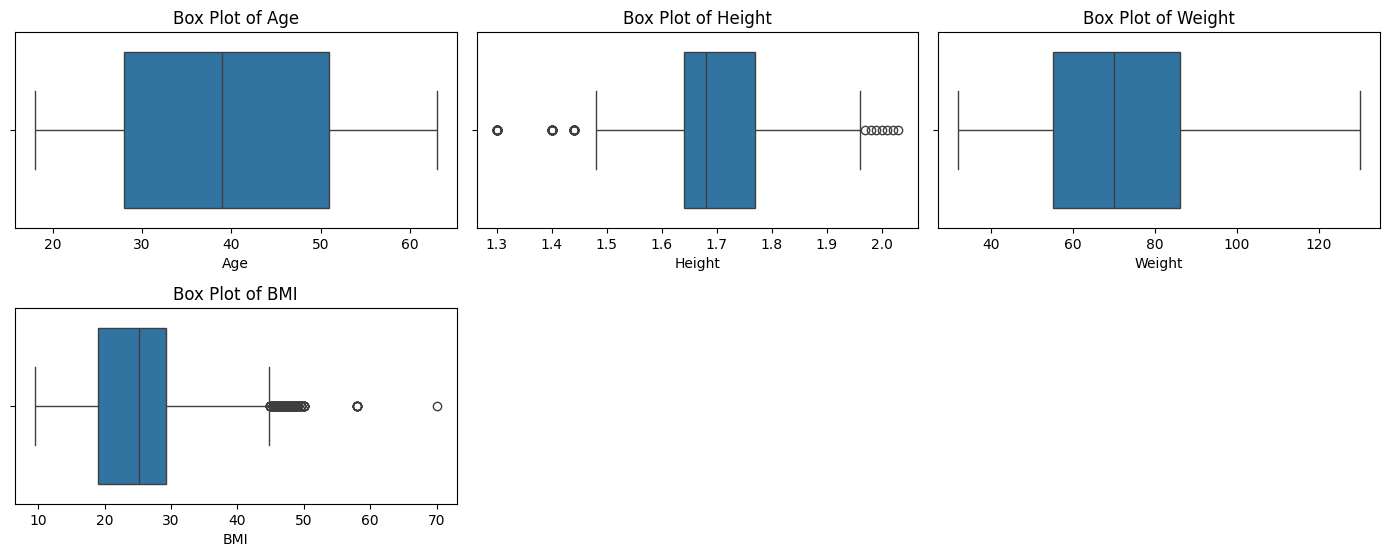

In [ ]:
columns_to_plot = ['Age', 'Height', 'Weight', 'BMI']

plt.figure(figsize=(14, 8))

for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(data=df, x=column)
    plt.title(f'Box Plot of {column}')
    plt.xlabel(column)

plt.tight_layout()
plt.show()

In [ ]:
df[df['BMI']==70]

,ID,Sex,Age,Height,Weight,Hypertension,Diabetes,BMI,Level,Fitness Goal,Fitness Type,Exercises,Diet
14450,14451,Male,29,1.66,68.0,No,No,70.0,Obuse,Weight Loss,Cardio Fitness,"Brisk walking, cycling, swimming, running , or...","Vegetables: (Broccoli, Carrots, Spinach, Lettu..."


In [ ]:
df.drop(df[df['BMI'] == 70].index, inplace=True)
df[df['BMI']==70]

,ID,Sex,Age,Height,Weight,Hypertension,Diabetes,BMI,Level,Fitness Goal,Fitness Type,Exercises,Diet


In [ ]:
df[df['BMI'] >= 50]

,ID,Sex,Age,Height,Weight,Hypertension,Diabetes,BMI,Level,Fitness Goal,Fitness Type,Exercises,Diet
2041,2042,Male,40,1.4,98.0,No,No,50.00,Obuse,Weight Loss,Cardio Fitness,"Brisk walking, cycling, swimming, running , or...","Vegetables: (Broccoli, Carrots, Spinach, Lettu..."
2042,2043,Male,40,1.4,98.0,Yes,No,50.00,Obuse,Weight Loss,Cardio Fitness,"Brisk walking, cycling, swimming, running , or...","Vegetables: (Garlic, Mushroom, Green Papper, I..."
2043,2044,Male,40,1.4,98.0,No,Yes,50.00,Obuse,Weight Loss,Cardio Fitness,"Walking, Yoga, Swimming.","Vegetables: (Garlic, Mushroom, Green Papper, I..."
2044,2045,Male,40,1.4,98.0,Yes,Yes,50.00,Obuse,Weight Loss,Cardio Fitness,"brisk walking, cycling, swimming, or dancing.","Vegetables: (Garlic, Mushroom, Green Papper, I..."
2045,2046,Female,40,1.4,98.0,No,No,50.00,Obuse,Weight Loss,Cardio Fitness,"Brisk walking, cycling, swimming, running , or...","Vegetables: (Broccoli, Carrots, Spinach, Lettu..."
2046,2047,Female,40,1.4,98.0,Yes,No,50.00,Obuse,Weight Loss,Cardio Fitness,"Brisk walking, cycling, swimming, running , or...","Vegetables: (Garlic, Mushroom, Green Papper, I..."
2047,2048,Female,40,1.4,98.0,No,Yes,50.00,Obuse,Weight Loss,Cardio Fitness,"Walking, Yoga, Swimming.","Vegetables: (Garlic, Mushroom, Green Papper, I..."
2048,2049,Female,40,1.4,98.0,Yes,Yes,50.00,Obuse,Weight Loss,Cardio Fitness,"brisk walking, cycling, swimming, or dancing.","Vegetables: (Garlic, Mushroom, Green Papper, I..."
2073,2074,Male,41,1.3,98.0,No,No,57.99,Obuse,Weight Loss,Cardio Fitness,"Brisk walking, cycling, swimming, running , or...","Vegetables: (Broccoli, Carrots, Spinach, Lettu..."
2074,2075,Male,41,1.3,98.0,Yes,No,57.99,Obuse,Weight Loss,Cardio Fitness,"Brisk walking, cycling, swimming, running , or...","Vegetables: (Garlic, Mushroom, Green Papper, I..."


In [ ]:
# Categorize BMI based on WHO
def categorize_bmi(bmi):
    if bmi < 18.5:
        return 'Insufficient_Weight'
    elif 18.5 <= bmi <= 24.9:
        return 'Normal_Weight'
    elif 25.0 <= bmi <= 27.5:
        return 'Overweight_Level_I'
    elif 27.6 <= bmi <= 29.9:
        return 'Overweight_Level_II'
    elif 30.0 <= bmi <= 34.9:
        return 'Obesity_Type_I'
    elif 35.0 <= bmi <= 39.9:
        return 'Obesity_Type_II'
    else:
        return 'Obesity_Type_III'

# Mengganti kolom 'Obesity Level' dengan kategori baru berdasarkan BMI
df['Level'] = df['BMI'].apply(categorize_bmi)
df

,ID,Sex,Age,Height,Weight,Hypertension,Diabetes,BMI,Level,Fitness Goal,Fitness Type,Exercises,Diet
0,1,Male,18,1.68,47.5,No,No,16.83,Insufficient_Weight,Weight Gain,Muscular Fitness,"Squats, deadlifts, bench presses, and overhead...","Vegetables: (Carrots, Sweet Potato, and Lettuc..."
1,2,Male,18,1.68,47.5,Yes,No,16.83,Insufficient_Weight,Weight Gain,Muscular Fitness,"Squats, deadlifts, bench presses, and overhead...","Vegetables: (Tomatoes, Garlic, leafy greens, b..."
2,3,Male,18,1.68,47.5,No,Yes,16.83,Insufficient_Weight,Weight Gain,Muscular Fitness,"Squats, yoga, deadlifts, bench presses, and ov...","Vegetables: (Garlic, Roma Tomatoes, Capers and..."
3,4,Male,18,1.68,47.5,Yes,Yes,16.83,Insufficient_Weight,Weight Gain,Muscular Fitness,"Squats, yoga, deadlifts, bench presses, and ov...","Vegetables: (Garlic, Roma Tomatoes, Capers, Gr..."
4,5,Male,18,1.68,47.5,No,No,16.83,Insufficient_Weight,Weight Gain,Muscular Fitness,"Squats, deadlifts, bench presses, and overhead...","Vegetables: (Carrots, Sweet Potato, Lettuce); ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14584,14585,Male,35,1.88,98.0,No,No,27.73,Overweight_Level_II,Weight Loss,Cardio Fitness,"Brisk walking, cycling, swimming, running , or...","Vegetables: (Broccoli, Carrots, Spinach, Lettu..."
14585,14586,Male,36,1.89,99.0,No,No,27.71,Overweight_Level_II,Weight Loss,Cardio Fitness,"Brisk walking, cycling, swimming, running , or...","Vegetables: (Broccoli, Carrots, Spinach, Lettu..."
14586,14587,Male,37,1.90,100.0,No,No,27.70,Overweight_Level_II,Weight Loss,Cardio Fitness,"Brisk walking, cycling, swimming, running , or...","Vegetables: (Broccoli, Carrots, Spinach, Lettu..."
14587,14588,Male,38,1.91,101.0,No,No,27.69,Overweight_Level_II,Weight Loss,Cardio Fitness,"Brisk walking, cycling, swimming, running , or...","Vegetables: (Broccoli, Carrots, Spinach, Lettu..."


In [ ]:
df['Level'].value_counts()

,count
Level,
Normal_Weight,3650
Insufficient_Weight,3358
Overweight_Level_I,2752
Obesity_Type_I,2749
Overweight_Level_II,1266
Obesity_Type_III,461
Obesity_Type_II,352


In [ ]:
df['Exercises'].unique()

array(['Squats, deadlifts, bench presses, and overhead presses',
       'Squats, yoga, deadlifts, bench presses, and overhead presses',
       'Brisk walking, cycling, swimming, running , or dancing.',
       'Walking, Yoga, Swimming.',
       'brisk walking, cycling, swimming, or dancing.'], dtype=object)

In [ ]:
df['Exercises'].value_counts()

,count
Exercises,
"Brisk walking, cycling, swimming, running , or dancing.",4205
"Squats, deadlifts, bench presses, and overhead presses",3632
"Squats, yoga, deadlifts, bench presses, and overhead presses",3376
"Walking, Yoga, Swimming.",1688
"brisk walking, cycling, swimming, or dancing.",1687


In [ ]:
def clean_exercise(exercise_list):
    # Ubah huruf menjadi kecil
    exercise_list = exercise_list.lower()
    # Hapus tanda baca dan kata penghubung
    for char in [".", "and", "or"]:
        exercise_list = exercise_list.replace(char, "")
    # Ganti spasi ekstra
    exercise_list = exercise_list.replace(", ", ",").replace(" ,", ",").strip()
    # Pisahkan aktivitas
    exercises = exercise_list.split(",")
    # Menghapus duplikasi kata
    items = [item.strip() for item in exercise_list.split(",") if item.strip()]
    unique_items = sorted(set(items), key=items.index)
    return ", ".join(exercises)

# Terapkan pembersihan data
df["Exercises"] = df["Exercises"].apply(clean_exercise)
df["Exercises"].value_counts()

,count
Exercises,
"brisk walking, cycling, swimming, running, dancing",4205
"squats, deadlifts, bench presses, overhead presses",3632
"squats, yoga, deadlifts, bench presses, overhead presses",3376
"walking, yoga, swimming",1688
"brisk walking, cycling, swimming, dancing",1687


In [ ]:
translation_exercises = {
    "brisk walking": "jalan cepat",
    "cycling": "bersepeda",
    "swimming": "berenang",
    "running": "lari",
    "dancing": "senam",
    "squats": "squat",
    "deadlifts": "deadlift",
    "bench presses": "bench press",
    "overhead presses": "overhead press",
    "walking": "jalan santai",
    "yoga": "yoga"
}

# Fungsi untuk menerjemahkan exercise
def translate_exercises(exercises_string):
    for english, indonesian in translation_exercises.items():
        exercises_string = exercises_string.replace(english, indonesian)
    return exercises_string

# Terapkan fungsi ke kolom 'Exercises'
df['Exercises'] = df['Exercises'].apply(translate_exercises)
df['Exercises'].value_counts()

,count
Exercises,
"jalan cepat, bersepeda, berenang, lari, senam",4205
"squat, deadlift, bench press, overhead press",3632
"squat, yoga, deadlift, bench press, overhead press",3376
"jalan santai, yoga, berenang",1688
"jalan cepat, bersepeda, berenang, senam",1687


In [ ]:
df['Diet'].unique()

array(['Vegetables: (Carrots, Sweet Potato, and Lettuce); Protein Intake: (Red meats, poultry, fish, eggs, dairy products, legumes, and nuts); Juice: (Fruit juice, watermelon juice, carrot juice, apple juice and mango juice)',
       'Vegetables: (Tomatoes, Garlic, leafy greens, broccoli, carrots, and bell peppers); Protein Intake: (poultry, fish, tofu, legumes, and low-fat dairy products); Juice: (Apple juice, beetroot juice and mango juice)',
       'Vegetables: (Garlic, Roma Tomatoes, Capers and Iceberg Lettuce); Protein Intake: (Cheese Standwish, Baru Nuts, Beech Nuts, Squash Seeds, and Mixed Teff); Juice: (Apple juice, beetroot juice and mango juice)',
       'Vegetables: (Garlic, Roma Tomatoes, Capers, Green Papper, and Iceberg Lettuce); Protein Intake: (Cheese Sandwich, Baru Nuts, Beech Nuts, Squash Seeds, Mixed Teff, peanut butter, and jelly sandwich); Juice: (Apple juice, beetroot juice, and mango juice)',
       'Vegetables: (Carrots, Sweet Potato, Lettuce); Protein Intake: (

In [ ]:
df['Diet'].value_counts()


,count
Diet,
"Vegetables: (Garlic, Mushroom, Green Papper, Icebetg Lettuce); Protein Intake: (Baru Nuts, Beech Nuts, Hemp Seeds, Cheese Spandwich); Juice: (Apple Juice, Mango juice,and Beetroot juice)",5038
"Vegetables: (Broccoli, Carrots, Spinach, Lettuce, Onion); Protein Intake: (Cheese, Cattoge cheese, Skim Milk, Law fat Milk, and Baru Nuts); Juice: (Fruit Juice, Aloe vera juice, Cold-pressed juice, and Watermelon juice)",2506
"Vegetables: (Garlic, Roma Tomatoes, Capers, Green Papper, and Iceberg Lettuce); Protein Intake: (Cheese Sandwich, Baru Nuts, Beech Nuts, Squash Seeds, Mixed Teff, peanut butter, and jelly sandwich); Juice: (Apple juice, beetroot juice, and mango juice)",1688
"Vegetables: (Mixed greens, cherry tomatoes, cucumbers, bell peppers, carrots, celery, bell peppers);Protein Intake: (Chicken, fish, tofu, or legumes); Juice : (Green juice,kale, spinach, cucumber, celery, and apple)",1100
"Vegetables: (Tomatoes, Garlic, leafy greens, broccoli, carrots, and bell peppers); Protein Intake: (poultry, fish, tofu, legumes, and low-fat dairy products); Juice: (Apple juice, beetroot juice and mango juice)",844
"Vegetables: (Garlic, Roma Tomatoes, Capers and Iceberg Lettuce); Protein Intake: (Cheese Standwish, Baru Nuts, Beech Nuts, Squash Seeds, and Mixed Teff); Juice: (Apple juice, beetroot juice and mango juice)",844
"Vegetables: (Garlic, mushroon, green papper and water chestnut);Protein Intake: ( Baru Nuts, Beech Nuts, and black walnut); Juice : (Apple juice, Mango, and Beetroot Juice)",844
"Vegetables: (Garlic, mushroon, green papper);Protein Intake: ( Baru Nuts, Beech Nuts, and Hemp Seeds); Juice : (Apple juice, Mango, and Beetroot Juice)",844
"Vegetables: (Carrots, Sweet Potato, and Lettuce); Protein Intake: (Red meats, poultry, fish, eggs, dairy products, legumes, and nuts); Juice: (Fruit juice, watermelon juice, carrot juice, apple juice and mango juice)",422


In [ ]:
df[df['Diet']=='Diet']

,ID,Sex,Age,Height,Weight,Hypertension,Diabetes,BMI,Level,Fitness Goal,Fitness Type,Exercises,Diet
2977,2978,Male,50,1.68,47.5,No,No,16.83,Insufficient_Weight,Weight Gain,Muscular Fitness,"squat, deadlift, bench press, overhead press",Diet
3010,3011,Male,51,1.68,47.5,Yes,No,16.83,Insufficient_Weight,Weight Gain,Muscular Fitness,"squat, deadlift, bench press, overhead press",Diet
3043,3044,Male,52,1.75,47.5,No,Yes,15.51,Insufficient_Weight,Weight Gain,Muscular Fitness,"squat, yoga, deadlift, bench press, overhead ...",Diet
3076,3077,Male,53,1.68,47.5,Yes,Yes,16.83,Insufficient_Weight,Weight Gain,Muscular Fitness,"squat, yoga, deadlift, bench press, overhead ...",Diet
3109,3110,Female,54,1.68,47.5,No,No,16.83,Insufficient_Weight,Weight Gain,Muscular Fitness,"squat, deadlift, bench press, overhead press",Diet
3142,3143,Female,55,1.68,47.5,Yes,No,16.83,Insufficient_Weight,Weight Gain,Muscular Fitness,"squat, deadlift, bench press, overhead press",Diet
3175,3176,Female,56,1.68,47.5,No,Yes,16.83,Insufficient_Weight,Weight Gain,Muscular Fitness,"squat, yoga, deadlift, bench press, overhead ...",Diet
3208,3209,Female,57,1.68,47.5,Yes,Yes,16.83,Insufficient_Weight,Weight Gain,Muscular Fitness,"squat, yoga, deadlift, bench press, overhead ...",Diet
3241,3242,Male,58,1.68,55.0,No,No,19.49,Normal_Weight,Weight Gain,Muscular Fitness,"squat, deadlift, bench press, overhead press",Diet
3274,3275,Male,59,1.68,55.0,Yes,No,19.49,Normal_Weight,Weight Gain,Muscular Fitness,"squat, deadlift, bench press, overhead press",Diet


In [ ]:
df.drop(df[df['Diet'] == 'Diet'].index, inplace=True)
df[df['Diet']=='Diet']

,ID,Sex,Age,Height,Weight,Hypertension,Diabetes,BMI,Level,Fitness Goal,Fitness Type,Exercises,Diet


In [ ]:
typo_corrections = {
    "papper": "pepper",
    "spandwich": "sandwich",
    "icebetg": "iceberg",
    "law": "low",
    "cold-pressed": "cold pressed",
    "standwish": "sandwich",
    "mushroon": "mushroom",
}

# Fungsi untuk membersihkan data
def clean_text(data):
    # Ubah ke huruf kecil
    data = data.lower()
    # Tambahkan koma sebelum "and" atau "or", lalu hapus "and" atau "or" kecuali pada sandwich
    data = re.sub(r"\b(and|or)\b(?!wich)", ", ", data)
    # Ganti tanda "-" dengan spasi
    data = data.replace("-", " ")
    # Koreksi typo
    for typo, correction in typo_corrections.items():
        data = data.replace(typo, correction)
    # Hapus koma kedua pada koma ganda
    data = re.sub(r",\s*,", ",", data)
    # Tambahkan spasi setelah koma yang hilang
    data = re.sub(r",([^\s])", r", \1", data)
    # Hapus spasi sebelum koma
    data = re.sub(r"\s+,", ",", data)
    # Hilangkan spasi berlebih
    data = re.sub(r"\s+", " ", data).strip()
    return data

# Terapkan fungsi ke seluruh kolom
df["Diet"] = df["Diet"].apply(clean_text)
df["Diet"].value_counts()

,count
Diet,
"vegetables: (garlic, mushroom, green pepper, iceberg lettuce); protein intake: (baru nuts, beech nuts, hemp seeds, cheese sandwich); juice: (apple juice, mango juice, beetroot juice)",5038
"vegetables: (broccoli, carrots, spinach, lettuce, onion); protein intake: (cheese, cattoge cheese, skim milk, low fat milk, baru nuts); juice: (fruit juice, aloe vera juice, cold pressed juice, watermelon juice)",2506
"vegetables: (garlic, roma tomatoes, capers, green pepper, iceberg lettuce); protein intake: (cheese sandwich, baru nuts, beech nuts, squash seeds, mixed teff, peanut butter, jelly sandwich); juice: (apple juice, beetroot juice, mango juice)",1688
"vegetables: (mixed greens, cherry tomatoes, cucumbers, bell peppers, carrots, celery, bell peppers);protein intake: (chicken, fish, tofu, legumes); juice : (green juice, kale, spinach, cucumber, celery, apple)",1100
"vegetables: (carrots, sweet potato, lettuce); protein intake: (red meats, poultry, fish, eggs, dairy products, legumes, nuts); juice: (fruit juice, watermelon juice, carrot juice, apple juice, mango juice)",844
"vegetables: (tomatoes, garlic, leafy greens, broccoli, carrots, bell peppers); protein intake: (poultry, fish, tofu, legumes, low fat dairy products); juice: (apple juice, beetroot juice, mango juice)",844
"vegetables: (garlic, roma tomatoes, capers, iceberg lettuce); protein intake: (cheese sandwich, baru nuts, beech nuts, squash seeds, mixed teff); juice: (apple juice, beetroot juice, mango juice)",844
"vegetables: (garlic, mushroom, green pepper, water chestnut);protein intake: ( baru nuts, beech nuts, black walnut); juice : (apple juice, mango, beetroot juice)",844
"vegetables: (garlic, mushroom, green pepper);protein intake: ( baru nuts, beech nuts, hemp seeds); juice : (apple juice, mango, beetroot juice)",844


In [ ]:
def split_diet(row):
    diet_parts = row.split(';')
    result = {}
    for part in diet_parts:
        if ':' in part:
            key, value = part.split(':', 1)
            result[key.strip()] = value.strip(' ()')
    return result

# Terapkan fungsi pada kolom Diet
diet_split = df['Diet'].apply(split_diet)

# Buat kolom baru berdasarkan hasil split
df['Vegetables'] = diet_split.apply(lambda x: x.get('vegetables', ''))
df['Protein Intake'] = diet_split.apply(lambda x: x.get('protein intake', ''))
df['Juice'] = diet_split.apply(lambda x: x.get('juice', ''))

df

,ID,Sex,Age,Height,Weight,Hypertension,Diabetes,BMI,Level,Fitness Goal,Fitness Type,Exercises,Diet,Vegetables,Protein Intake,Juice
0,1,Male,18,1.68,47.5,No,No,16.83,Insufficient_Weight,Weight Gain,Muscular Fitness,"squat, deadlift, bench press, overhead press","vegetables: (carrots, sweet potato, lettuce); ...","carrots, sweet potato, lettuce","red meats, poultry, fish, eggs, dairy products...","fruit juice, watermelon juice, carrot juice, a..."
1,2,Male,18,1.68,47.5,Yes,No,16.83,Insufficient_Weight,Weight Gain,Muscular Fitness,"squat, deadlift, bench press, overhead press","vegetables: (tomatoes, garlic, leafy greens, b...","tomatoes, garlic, leafy greens, broccoli, carr...","poultry, fish, tofu, legumes, low fat dairy pr...","apple juice, beetroot juice, mango juice"
2,3,Male,18,1.68,47.5,No,Yes,16.83,Insufficient_Weight,Weight Gain,Muscular Fitness,"squat, yoga, deadlift, bench press, overhead ...","vegetables: (garlic, roma tomatoes, capers, ic...","garlic, roma tomatoes, capers, iceberg lettuce","cheese sandwich, baru nuts, beech nuts, squash...","apple juice, beetroot juice, mango juice"
3,4,Male,18,1.68,47.5,Yes,Yes,16.83,Insufficient_Weight,Weight Gain,Muscular Fitness,"squat, yoga, deadlift, bench press, overhead ...","vegetables: (garlic, roma tomatoes, capers, gr...","garlic, roma tomatoes, capers, green pepper, i...","cheese sandwich, baru nuts, beech nuts, squash...","apple juice, beetroot juice, mango juice"
4,5,Male,18,1.68,47.5,No,No,16.83,Insufficient_Weight,Weight Gain,Muscular Fitness,"squat, deadlift, bench press, overhead press","vegetables: (carrots, sweet potato, lettuce); ...","carrots, sweet potato, lettuce","red meats, poultry, fish, eggs, dairy products...","fruit juice, watermelon juice, carrot juice, a..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14584,14585,Male,35,1.88,98.0,No,No,27.73,Overweight_Level_II,Weight Loss,Cardio Fitness,"jalan cepat, bersepeda, berenang, lari, senam","vegetables: (broccoli, carrots, spinach, lettu...","broccoli, carrots, spinach, lettuce, onion","cheese, cattoge cheese, skim milk, low fat mil...","fruit juice, aloe vera juice, cold pressed jui..."
14585,14586,Male,36,1.89,99.0,No,No,27.71,Overweight_Level_II,Weight Loss,Cardio Fitness,"jalan cepat, bersepeda, berenang, lari, senam","vegetables: (broccoli, carrots, spinach, lettu...","broccoli, carrots, spinach, lettuce, onion","cheese, cattoge cheese, skim milk, low fat mil...","fruit juice, aloe vera juice, cold pressed jui..."
14586,14587,Male,37,1.90,100.0,No,No,27.70,Overweight_Level_II,Weight Loss,Cardio Fitness,"jalan cepat, bersepeda, berenang, lari, senam","vegetables: (broccoli, carrots, spinach, lettu...","broccoli, carrots, spinach, lettuce, onion","cheese, cattoge cheese, skim milk, low fat mil...","fruit juice, aloe vera juice, cold pressed jui..."
14587,14588,Male,38,1.91,101.0,No,No,27.69,Overweight_Level_II,Weight Loss,Cardio Fitness,"jalan cepat, bersepeda, berenang, lari, senam","vegetables: (broccoli, carrots, spinach, lettu...","broccoli, carrots, spinach, lettuce, onion","cheese, cattoge cheese, skim milk, low fat mil...","fruit juice, aloe vera juice, cold pressed jui..."


In [ ]:
df['Vegetables'].value_counts()

,count
Vegetables,
"garlic, mushroom, green pepper, iceberg lettuce",5038
"broccoli, carrots, spinach, lettuce, onion",2506
"garlic, roma tomatoes, capers, green pepper, iceberg lettuce",1688
"mixed greens, cherry tomatoes, cucumbers, bell peppers, carrots, celery, bell peppers",1100
"carrots, sweet potato, lettuce",844
"tomatoes, garlic, leafy greens, broccoli, carrots, bell peppers",844
"garlic, roma tomatoes, capers, iceberg lettuce",844
"garlic, mushroom, green pepper, water chestnut",844
"garlic, mushroom, green pepper",844


In [ ]:
translation_vegetables = {
    "garlic": "bawang putih",
    "mushroom": "jamur",
    "green pepper": "paprika hijau",
    "iceberg lettuce": "selada iceberg",
    "broccoli": "brokoli",
    "carrots": "wortel",
    "spinach": "bayam",
    "lettuce": "selada",
    "onion": "bawang bombai",
    "roma tomatoes": "tomat roma",
    "capers": "kemangi",
    "mixed greens": "campuran daun hijau",
    "cherry tomatoes": "tomat ceri",
    "cucumbers": "mentimun",
    "bell peppers": "paprika",
    "celery": "seledri",
    "sweet potato": "ubi jalar",
    "tomatoes": "tomat",
    "leafy greens": "sayuran hijau",
    "water chestnut": "bengkuang"
}

# Fungsi untuk menerjemahkan sayuran
def translate_vegetables(vegetables_string):
    for english, indonesian in translation_vegetables.items():
        vegetables_string = vegetables_string.replace(english, indonesian)
    return vegetables_string

# Terapkan fungsi ke kolom 'Vegetables'
df['Vegetables'] = df['Vegetables'].apply(translate_vegetables)
df['Vegetables'].value_counts()

,count
Vegetables,
"bawang putih, jamur, paprika hijau, selada iceberg",5038
"brokoli, wortel, bayam, selada, bawang bombai",2506
"bawang putih, tomat roma, kemangi, paprika hijau, selada iceberg",1688
"campuran daun hijau, tomat ceri, mentimun, paprika, wortel, seledri, paprika",1100
"wortel, ubi jalar, selada",844
"tomat, bawang putih, sayuran hijau, brokoli, wortel, paprika",844
"bawang putih, tomat roma, kemangi, selada iceberg",844
"bawang putih, jamur, paprika hijau, bengkuang",844
"bawang putih, jamur, paprika hijau",844


In [ ]:
# Fungsi untuk menghapus kata yang duplikat yaitu 'paprika'
def remove_one_instance(vegetable_string, word_to_remove):
    return vegetable_string.replace(f"{word_to_remove}, ", "", 1)

df['Vegetables'] = df['Vegetables'].apply(remove_one_instance, word_to_remove="paprika")
df['Vegetables'].value_counts()

,count
Vegetables,
"bawang putih, jamur, paprika hijau, selada iceberg",5038
"brokoli, wortel, bayam, selada, bawang bombai",2506
"bawang putih, tomat roma, kemangi, paprika hijau, selada iceberg",1688
"campuran daun hijau, tomat ceri, mentimun, wortel, seledri, paprika",1100
"wortel, ubi jalar, selada",844
"tomat, bawang putih, sayuran hijau, brokoli, wortel, paprika",844
"bawang putih, tomat roma, kemangi, selada iceberg",844
"bawang putih, jamur, paprika hijau, bengkuang",844
"bawang putih, jamur, paprika hijau",844


In [ ]:
df['Protein Intake'].value_counts()

,count
Protein Intake,
"baru nuts, beech nuts, hemp seeds, cheese sandwich",5038
"cheese, cattoge cheese, skim milk, low fat milk, baru nuts",2506
"cheese sandwich, baru nuts, beech nuts, squash seeds, mixed teff, peanut butter, jelly sandwich",1688
"chicken, fish, tofu, legumes",1100
"red meats, poultry, fish, eggs, dairy products, legumes, nuts",844
"poultry, fish, tofu, legumes, low fat dairy products",844
"cheese sandwich, baru nuts, beech nuts, squash seeds, mixed teff",844
"baru nuts, beech nuts, black walnut",844
"baru nuts, beech nuts, hemp seeds",844


In [ ]:
translation_proteins = {
    "baru nuts": "kacang tanah",
    "beech nuts": "kacang mete",
    "hemp seeds": "biji wijen",
    "mixed teff": "beras merah",
    "squash seeds": "biji labu kuning",
    "peanut butter": "selai kacang",
    "jelly sandwich": "roti lapis dengan selai",
    "low fat milk": "susu rendah lemak",
    "low fat dairy products": "produk susu rendah lemak",
    "cheese sandwich": "roti lapis keju",
    "skim milk": "susu skim",
    "cattoge cheese": "keju cottage",
    "cheese": "keju",
    "nuts": "kacang-kacangan",
    "black walnut": "kacang kenari",
    "chicken": "daging ayam",
    "fish": "daging ikan",
    "tofu": "tahu",
    "legumes": "polong-polongan",
    "red meats": "daging merah",
    "poultry": "daging unggas",
    "eggs": "telur",
    "dairy products": "produk olahan susu"
}

# Fungsi untuk menerjemahkan dan mengganti protein
def translate_proteins(protein_string):
    for english, indonesian in translation_proteins.items():
        protein_string = protein_string.replace(english, indonesian)
    return protein_string

# Terapkan fungsi ke dataset
df['Protein Intake'] = df['Protein Intake'].apply(translate_proteins)
df['Protein Intake'].value_counts()

,count
Protein Intake,
"kacang tanah, kacang mete, biji wijen, roti lapis keju",5038
"keju, keju cottage, susu skim, susu rendah lemak, kacang tanah",2506
"roti lapis keju, kacang tanah, kacang mete, biji labu kuning, beras merah, selai kacang, roti lapis dengan selai",1688
"daging ayam, daging ikan, tahu, polong-polongan",1100
"daging merah, daging unggas, daging ikan, telur, produk olahan susu, polong-polongan, kacang-kacangan",844
"daging unggas, daging ikan, tahu, polong-polongan, produk susu rendah lemak",844
"roti lapis keju, kacang tanah, kacang mete, biji labu kuning, beras merah",844
"kacang tanah, kacang mete, kacang kenari",844
"kacang tanah, kacang mete, biji wijen",844


In [ ]:
df['Juice'].value_counts()

,count
Juice,
"apple juice, mango juice, beetroot juice",5038
"apple juice, beetroot juice, mango juice",3376
"fruit juice, aloe vera juice, cold pressed juice, watermelon juice",2506
"apple juice, mango, beetroot juice",1688
"green juice, kale, spinach, cucumber, celery, apple",1100
"fruit juice, watermelon juice, carrot juice, apple juice, mango juice",844


In [ ]:
translation_juices = {
    "beetroot juice": "jus buah bit",
    "aloe vera juice": "jus lidah buaya",
    "cold pressed juice": "jus cold pressed",
    "kale": "jus kale",
    "spinach": "jus bayam",
    "apple juice": "jus apel",
    "mango juice": "jus mangga",
    "watermelon juice": "jus semangka",
    "carrot juice": "jus wortel",
    "fruit juice": "jus buah",
    "green juice": "jus sayuran hijau",
    "cucumber": "jus mentimun",
    "celery": "jus seledri",
    "mango": "jus mangga",
    "apple": "jus apel"
}

# Fungsi untuk menerjemahkan dan mengganti jus
def translate_juices(juice_string):
    for english, indonesian in translation_juices.items():
        juice_string = juice_string.replace(english, indonesian)
    return juice_string

# Terapkan fungsi ke dataset
df['Juice'] = df['Juice'].apply(translate_juices)
df['Juice'].value_counts()

,count
Juice,
"jus apel, jus mangga, jus buah bit",6726
"jus apel, jus buah bit, jus mangga",3376
"jus buah, jus lidah buaya, jus cold pressed, jus semangka",2506
"jus sayuran hijau, jus kale, jus bayam, jus mentimun, jus seledri, jus apel",1100
"jus buah, jus semangka, jus wortel, jus apel, jus mangga",844


In [ ]:
translate_gender = {
    "Male": "pria",
    "Female": "perempuan"
}

# Fungsi untuk mengganti nilai pada kolom 'Sex'
df['Sex'] = df['Sex'].replace(translate_gender)

In [ ]:
translate_hypertension = {
    "Yes": "iya",
    "No": "tidak"
}

# Fungsi untuk mengganti nilai pada kolom 'Hypertension'
df['Hypertension'] = df['Hypertension'].replace(translate_hypertension)

In [ ]:
translate_diabetes = {
    "Yes": "iya",
    "No": "tidak"
}

# Fungsi untuk mengganti nilai pada kolom 'Diabetes'
df['Diabetes'] = df['Diabetes'].replace(translate_diabetes)

In [ ]:
# Mengubah ukuran 'Height' menjadi cm dan tipe datanya menjadi integer
df['Height'] = (df['Height'] * 100).astype(int)

In [ ]:
df

,ID,Sex,Age,Height,Weight,Hypertension,Diabetes,BMI,Level,Fitness Goal,Fitness Type,Exercises,Diet,Vegetables,Protein Intake,Juice
0,1,pria,18,168,47.5,tidak,tidak,16.83,Insufficient_Weight,Weight Gain,Muscular Fitness,"squat, deadlift, bench press, overhead press","vegetables: (carrots, sweet potato, lettuce); ...","wortel, ubi jalar, selada","daging merah, daging unggas, daging ikan, telu...","jus buah, jus semangka, jus wortel, jus apel, ..."
1,2,pria,18,168,47.5,iya,tidak,16.83,Insufficient_Weight,Weight Gain,Muscular Fitness,"squat, deadlift, bench press, overhead press","vegetables: (tomatoes, garlic, leafy greens, b...","tomat, bawang putih, sayuran hijau, brokoli, w...","daging unggas, daging ikan, tahu, polong-polon...","jus apel, jus buah bit, jus mangga"
2,3,pria,18,168,47.5,tidak,iya,16.83,Insufficient_Weight,Weight Gain,Muscular Fitness,"squat, yoga, deadlift, bench press, overhead ...","vegetables: (garlic, roma tomatoes, capers, ic...","bawang putih, tomat roma, kemangi, selada iceberg","roti lapis keju, kacang tanah, kacang mete, bi...","jus apel, jus buah bit, jus mangga"
3,4,pria,18,168,47.5,iya,iya,16.83,Insufficient_Weight,Weight Gain,Muscular Fitness,"squat, yoga, deadlift, bench press, overhead ...","vegetables: (garlic, roma tomatoes, capers, gr...","bawang putih, tomat roma, kemangi, paprika hij...","roti lapis keju, kacang tanah, kacang mete, bi...","jus apel, jus buah bit, jus mangga"
4,5,pria,18,168,47.5,tidak,tidak,16.83,Insufficient_Weight,Weight Gain,Muscular Fitness,"squat, deadlift, bench press, overhead press","vegetables: (carrots, sweet potato, lettuce); ...","wortel, ubi jalar, selada","daging merah, daging unggas, daging ikan, telu...","jus buah, jus semangka, jus wortel, jus apel, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14584,14585,pria,35,188,98.0,tidak,tidak,27.73,Overweight_Level_II,Weight Loss,Cardio Fitness,"jalan cepat, bersepeda, berenang, lari, senam","vegetables: (broccoli, carrots, spinach, lettu...","brokoli, wortel, bayam, selada, bawang bombai","keju, keju cottage, susu skim, susu rendah lem...","jus buah, jus lidah buaya, jus cold pressed, j..."
14585,14586,pria,36,189,99.0,tidak,tidak,27.71,Overweight_Level_II,Weight Loss,Cardio Fitness,"jalan cepat, bersepeda, berenang, lari, senam","vegetables: (broccoli, carrots, spinach, lettu...","brokoli, wortel, bayam, selada, bawang bombai","keju, keju cottage, susu skim, susu rendah lem...","jus buah, jus lidah buaya, jus cold pressed, j..."
14586,14587,pria,37,190,100.0,tidak,tidak,27.70,Overweight_Level_II,Weight Loss,Cardio Fitness,"jalan cepat, bersepeda, berenang, lari, senam","vegetables: (broccoli, carrots, spinach, lettu...","brokoli, wortel, bayam, selada, bawang bombai","keju, keju cottage, susu skim, susu rendah lem...","jus buah, jus lidah buaya, jus cold pressed, j..."
14587,14588,pria,38,191,101.0,tidak,tidak,27.69,Overweight_Level_II,Weight Loss,Cardio Fitness,"jalan cepat, bersepeda, berenang, lari, senam","vegetables: (broccoli, carrots, spinach, lettu...","brokoli, wortel, bayam, selada, bawang bombai","keju, keju cottage, susu skim, susu rendah lem...","jus buah, jus lidah buaya, jus cold pressed, j..."


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14552 entries, 0 to 14588
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID              14552 non-null  int64  
 1   Sex             14552 non-null  object 
 2   Age             14552 non-null  int64  
 3   Height          14552 non-null  int64  
 4   Weight          14552 non-null  float64
 5   Hypertension    14552 non-null  object 
 6   Diabetes        14552 non-null  object 
 7   BMI             14552 non-null  float64
 8   Level           14552 non-null  object 
 9   Fitness Goal    14552 non-null  object 
 10  Fitness Type    14552 non-null  object 
 11  Exercises       14552 non-null  object 
 12  Diet            14552 non-null  object 
 13  Vegetables      14552 non-null  object 
 14  Protein Intake  14552 non-null  object 
 15  Juice           14552 non-null  object 
dtypes: float64(2), int64(3), object(11)
memory usage: 1.9+ MB


**Membagi Data Exercise per Hari**

Based on American College of Sports Medicine (ACSM), to promote and maintain health, all healthy adults aged 18 to 65 years need:

* Do moderately intense cardio 30 minutes a day, 5 days a week.
* Do vigorously intense cardio 20 minutes a day, 3 days a week.
* Do 8-10 strength training exercises, 8-12 repetitions of each exercise twice a week.

In [ ]:
# ACSM time durations
activity_times = {
    "jalan cepat": "30 menit",
    "bersepeda": "30 menit",
    "berenang": "20 menit",
    "lari": "20 menit",
    "senam": "30 menit",
    "squat": "8-12 reps x 2 set",
    "deadlift": "8-12 reps x 2 set",
    "bench press": "8-12 reps x 2 set",
    "overhead press": "8-12 reps x 2 set",
    "yoga": "30 menit",
    "jalan santai": "30 menit",
    "istirahat": "istirahat"
}

# Days of the week
days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

# Rest Days
rest_days = ['Wednesday', 'Sunday']

def schedule_exercises(exercises):
    # Split and clean the exercises
    exercises = [e.strip() for e in exercises.split(",")]
    num_exercises = len(exercises)

    # Initialize the distributed schedule
    distributed = {day: "istirahat" if day in rest_days else "" for day in days}

    # Distribute exercises to non-rest days
    exercise_index = 0
    for day in days:
        if day not in rest_days:  # Skip rest days
            current_exercise = exercises[exercise_index % num_exercises]
            distributed[day] = f"{current_exercise} ({activity_times.get(current_exercise, '30 menit')})"
            exercise_index += 1

    return distributed

# Apply the scheduling function to the dataframe
for day in days:
    df[day] = df["Exercises"].apply(lambda x: schedule_exercises(x)[day])

df

,ID,Sex,Age,Height,Weight,Hypertension,Diabetes,BMI,Level,Fitness Goal,...,Vegetables,Protein Intake,Juice,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
0,1,pria,18,168,47.5,tidak,tidak,16.83,Insufficient_Weight,Weight Gain,...,"wortel, ubi jalar, selada","daging merah, daging unggas, daging ikan, telu...","jus buah, jus semangka, jus wortel, jus apel, ...",squat (8-12 reps x 2 set),deadlift (8-12 reps x 2 set),istirahat,bench press (8-12 reps x 2 set),overhead press (8-12 reps x 2 set),squat (8-12 reps x 2 set),istirahat
1,2,pria,18,168,47.5,iya,tidak,16.83,Insufficient_Weight,Weight Gain,...,"tomat, bawang putih, sayuran hijau, brokoli, w...","daging unggas, daging ikan, tahu, polong-polon...","jus apel, jus buah bit, jus mangga",squat (8-12 reps x 2 set),deadlift (8-12 reps x 2 set),istirahat,bench press (8-12 reps x 2 set),overhead press (8-12 reps x 2 set),squat (8-12 reps x 2 set),istirahat
2,3,pria,18,168,47.5,tidak,iya,16.83,Insufficient_Weight,Weight Gain,...,"bawang putih, tomat roma, kemangi, selada iceberg","roti lapis keju, kacang tanah, kacang mete, bi...","jus apel, jus buah bit, jus mangga",squat (8-12 reps x 2 set),yoga (30 menit),istirahat,deadlift (8-12 reps x 2 set),bench press (8-12 reps x 2 set),overhead press (8-12 reps x 2 set),istirahat
3,4,pria,18,168,47.5,iya,iya,16.83,Insufficient_Weight,Weight Gain,...,"bawang putih, tomat roma, kemangi, paprika hij...","roti lapis keju, kacang tanah, kacang mete, bi...","jus apel, jus buah bit, jus mangga",squat (8-12 reps x 2 set),yoga (30 menit),istirahat,deadlift (8-12 reps x 2 set),bench press (8-12 reps x 2 set),overhead press (8-12 reps x 2 set),istirahat
4,5,pria,18,168,47.5,tidak,tidak,16.83,Insufficient_Weight,Weight Gain,...,"wortel, ubi jalar, selada","daging merah, daging unggas, daging ikan, telu...","jus buah, jus semangka, jus wortel, jus apel, ...",squat (8-12 reps x 2 set),deadlift (8-12 reps x 2 set),istirahat,bench press (8-12 reps x 2 set),overhead press (8-12 reps x 2 set),squat (8-12 reps x 2 set),istirahat
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14584,14585,pria,35,188,98.0,tidak,tidak,27.73,Overweight_Level_II,Weight Loss,...,"brokoli, wortel, bayam, selada, bawang bombai","keju, keju cottage, susu skim, susu rendah lem...","jus buah, jus lidah buaya, jus cold pressed, j...",jalan cepat (30 menit),bersepeda (30 menit),istirahat,berenang (20 menit),lari (20 menit),senam (30 menit),istirahat
14585,14586,pria,36,189,99.0,tidak,tidak,27.71,Overweight_Level_II,Weight Loss,...,"brokoli, wortel, bayam, selada, bawang bombai","keju, keju cottage, susu skim, susu rendah lem...","jus buah, jus lidah buaya, jus cold pressed, j...",jalan cepat (30 menit),bersepeda (30 menit),istirahat,berenang (20 menit),lari (20 menit),senam (30 menit),istirahat
14586,14587,pria,37,190,100.0,tidak,tidak,27.70,Overweight_Level_II,Weight Loss,...,"brokoli, wortel, bayam, selada, bawang bombai","keju, keju cottage, susu skim, susu rendah lem...","jus buah, jus lidah buaya, jus cold pressed, j...",jalan cepat (30 menit),bersepeda (30 menit),istirahat,berenang (20 menit),lari (20 menit),senam (30 menit),istirahat
14587,14588,pria,38,191,101.0,tidak,tidak,27.69,Overweight_Level_II,Weight Loss,...,"brokoli, wortel, bayam, selada, bawang bombai","keju, keju cottage, susu skim, susu rendah lem...","jus buah, jus lidah buaya, jus cold pressed, j...",jalan cepat (30 menit),bersepeda (30 menit),istirahat,berenang (20 menit),lari (20 menit),senam (30 menit),istirahat


In [ ]:
new_column_names = [
    "id", "gender", "age", "height", "weight", "hypertension_status",
    "diabetes_status", "BMI", "user_obesity_level", "fitness_goal",
    "fitness_type", "exercises", "diet", "vegetables", "protein_intake",
    "juice", "monday_schedule", "tuesday_schedule", "wednesday_schedule",
    "thursday_schedule", "friday_schedule", "saturday_schedule", "sunday_schedule"
]

df.columns = new_column_names
df

,id,gender,age,height,weight,hypertension_status,diabetes_status,BMI,user_obesity_level,fitness_goal,...,vegetables,protein_intake,juice,monday_schedule,tuesday_schedule,wednesday_schedule,thursday_schedule,friday_schedule,saturday_schedule,sunday_schedule
0,1,pria,18,168,47.5,tidak,tidak,16.83,Insufficient_Weight,Weight Gain,...,"wortel, ubi jalar, selada","daging merah, daging unggas, daging ikan, telu...","jus buah, jus semangka, jus wortel, jus apel, ...",squat (8-12 reps x 2 set),deadlift (8-12 reps x 2 set),istirahat,bench press (8-12 reps x 2 set),overhead press (8-12 reps x 2 set),squat (8-12 reps x 2 set),istirahat
1,2,pria,18,168,47.5,iya,tidak,16.83,Insufficient_Weight,Weight Gain,...,"tomat, bawang putih, sayuran hijau, brokoli, w...","daging unggas, daging ikan, tahu, polong-polon...","jus apel, jus buah bit, jus mangga",squat (8-12 reps x 2 set),deadlift (8-12 reps x 2 set),istirahat,bench press (8-12 reps x 2 set),overhead press (8-12 reps x 2 set),squat (8-12 reps x 2 set),istirahat
2,3,pria,18,168,47.5,tidak,iya,16.83,Insufficient_Weight,Weight Gain,...,"bawang putih, tomat roma, kemangi, selada iceberg","roti lapis keju, kacang tanah, kacang mete, bi...","jus apel, jus buah bit, jus mangga",squat (8-12 reps x 2 set),yoga (30 menit),istirahat,deadlift (8-12 reps x 2 set),bench press (8-12 reps x 2 set),overhead press (8-12 reps x 2 set),istirahat
3,4,pria,18,168,47.5,iya,iya,16.83,Insufficient_Weight,Weight Gain,...,"bawang putih, tomat roma, kemangi, paprika hij...","roti lapis keju, kacang tanah, kacang mete, bi...","jus apel, jus buah bit, jus mangga",squat (8-12 reps x 2 set),yoga (30 menit),istirahat,deadlift (8-12 reps x 2 set),bench press (8-12 reps x 2 set),overhead press (8-12 reps x 2 set),istirahat
4,5,pria,18,168,47.5,tidak,tidak,16.83,Insufficient_Weight,Weight Gain,...,"wortel, ubi jalar, selada","daging merah, daging unggas, daging ikan, telu...","jus buah, jus semangka, jus wortel, jus apel, ...",squat (8-12 reps x 2 set),deadlift (8-12 reps x 2 set),istirahat,bench press (8-12 reps x 2 set),overhead press (8-12 reps x 2 set),squat (8-12 reps x 2 set),istirahat
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14584,14585,pria,35,188,98.0,tidak,tidak,27.73,Overweight_Level_II,Weight Loss,...,"brokoli, wortel, bayam, selada, bawang bombai","keju, keju cottage, susu skim, susu rendah lem...","jus buah, jus lidah buaya, jus cold pressed, j...",jalan cepat (30 menit),bersepeda (30 menit),istirahat,berenang (20 menit),lari (20 menit),senam (30 menit),istirahat
14585,14586,pria,36,189,99.0,tidak,tidak,27.71,Overweight_Level_II,Weight Loss,...,"brokoli, wortel, bayam, selada, bawang bombai","keju, keju cottage, susu skim, susu rendah lem...","jus buah, jus lidah buaya, jus cold pressed, j...",jalan cepat (30 menit),bersepeda (30 menit),istirahat,berenang (20 menit),lari (20 menit),senam (30 menit),istirahat
14586,14587,pria,37,190,100.0,tidak,tidak,27.70,Overweight_Level_II,Weight Loss,...,"brokoli, wortel, bayam, selada, bawang bombai","keju, keju cottage, susu skim, susu rendah lem...","jus buah, jus lidah buaya, jus cold pressed, j...",jalan cepat (30 menit),bersepeda (30 menit),istirahat,berenang (20 menit),lari (20 menit),senam (30 menit),istirahat
14587,14588,pria,38,191,101.0,tidak,tidak,27.69,Overweight_Level_II,Weight Loss,...,"brokoli, wortel, bayam, selada, bawang bombai","keju, keju cottage, susu skim, susu rendah lem...","jus buah, jus lidah buaya, jus cold pressed, j...",jalan cepat (30 menit),bersepeda (30 menit),istirahat,berenang (20 menit),lari (20 menit),senam (30 menit),istirahat


In [ ]:
df.to_csv('gym_and_diet_recommendation_clean_dataset.csv', index=False)